In [1]:
import gpflow
import matplotlib.pyplot as plt
import tensorflow as tf
from gpflow.utilities import print_summary
import numpy as np

# The lines below are specific to the notebook format
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
data = {}

data['X'] = [-1,-.2,-.1,0,.35,.66,.8]
data['Y'] = [0,0.1,0,-.4,-.8,.37,0.8]


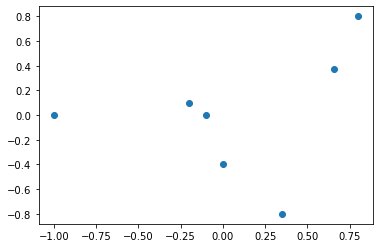

In [8]:
plt.scatter(data['X'],data['Y'])

In [9]:
kernel =  gpflow.kernels.Matern52( variance=1, lengthscales=1.2)

darr=[np.array(data['X']).reshape(-1,1), np.array(data['Y']).reshape(-1,1)]

m = gpflow.models.GPR(data=darr, kernel=kernel, mean_function=None)
m.trainable_variables

m.likelihood.variance.assign(0.01)

opt = gpflow.optimizers.Scipy()
opt_logs = opt.minimize(m.training_loss, m.trainable_variables, options=dict(maxiter=100))
print_summary(m)

╒═════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤═══════════╕
│ name                    │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │     value │
╞═════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪═══════════╡
│ GPR.kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 0.315666  │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼───────────┤
│ GPR.kernel.lengthscales │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 0.281668  │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼───────────┤
│ GPR.likelihood.variance │ Parameter │ Softplus + Shift │         │ True        │ ()      │ float64 │ 0.0018518 │
╘═════════════════════════╧═══════════╧══════════════════╧═════════╧════════════

In [69]:
# predict 

npoints = 100
xx = np.linspace(-1, 1, npoints).reshape(npoints, 1).astype(np.float64)  
data['pX'] = list(xx[:, 0])
mean, var = m.predict_f(xx)

data['pY']= list(mean.numpy()[:,0])
data['perr']= list(- 1.96 * np.sqrt(var)[:,0]),


samples = m.predict_f_samples(xx, 200) 
data['samples'] = [list(i.numpy()[:,0]) for i in samples]

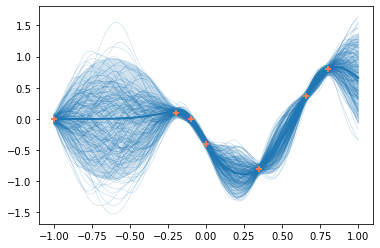

In [70]:
plt.figure()

plt.plot(data['pX'], mean, "C0", lw=2)
plt.fill_between(
    data['pX'],
    mean[:, 0] - 1.96 * np.sqrt(var[:, 0]),
    mean[:, 0] + 1.96 * np.sqrt(var[:, 0]),
    color="C0",
    alpha=0.2,
)

plt.plot(data['pX'], samples[:, :, 0].numpy().T, "C0", linewidth=0.5,alpha = .3)

# plt.plot(Xsec, y2,linewidth=.51,c='red')
plt.plot(data['X'], data['Y'],'k+',mew=1.84 ,c = 'coral' )
# 

In [72]:
import json
json.dump(data,open('webplot.json','w'))
# json.dumps(data)

for i in data:
    print(i,type(data[i]))


X <class 'list'>
Y <class 'list'>
pX <class 'list'>
pY <class 'list'>
perr <class 'tuple'>
samples <class 'list'>


In [62]:
data

{'X': [-1, -0.2, -0.1, 0, 0.35, 0.66, 0.8],
 'Y': [0, 0.1, 0, -0.4, -0.8, 0.37, 0.8],
 'pX': [-1.0,
  -0.9797979797979798,
  -0.9595959595959596,
  -0.9393939393939394,
  -0.9191919191919192,
  -0.898989898989899,
  -0.8787878787878788,
  -0.8585858585858586,
  -0.8383838383838383,
  -0.8181818181818181,
  -0.797979797979798,
  -0.7777777777777778,
  -0.7575757575757576,
  -0.7373737373737373,
  -0.7171717171717171,
  -0.696969696969697,
  -0.6767676767676767,
  -0.6565656565656566,
  -0.6363636363636364,
  -0.6161616161616161,
  -0.5959595959595959,
  -0.5757575757575757,
  -0.5555555555555556,
  -0.5353535353535352,
  -0.5151515151515151,
  -0.4949494949494949,
  -0.4747474747474747,
  -0.4545454545454545,
  -0.43434343434343425,
  -0.41414141414141414,
  -0.3939393939393939,
  -0.3737373737373737,
  -0.3535353535353535,
  -0.33333333333333326,
  -0.31313131313131304,
  -0.2929292929292928,
  -0.2727272727272727,
  -0.2525252525252525,
  -0.23232323232323226,
  -0.21212121212121204,
